# Forest Cover Data set

## Dataset Description
#### The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

`1 - Spruce/Fir
2 - Lodgepole Pine
3 - Ponderosa Pine
4 - Cottonwood/Willow
5 - Aspen
6 - Douglas-fir
7 - Krummholz`

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).

Data Fields
Elevation - Elevation in meters
Aspect - Aspect in degrees azimuth
Slope - Slope in degrees
Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

The wilderness areas are:

`1 - Rawah Wilderness Area
2 - Neota Wilderness Area
3 - Comanche Peak Wilderness Area
4 - Cache la Poudre Wilderness Area`

The soil types are:

1 Cathedral family - Rock outcrop complex, extremely stony.
2 Vanet - Ratake families complex, very stony.
3 Haploborolis - Rock outcrop complex, rubbly.
4 Ratake family - Rock outcrop complex, rubbly.
5 Vanet family - Rock outcrop complex complex, rubbly.
6 Vanet - Wetmore families - Rock outcrop complex, stony.
7 Gothic family.
8 Supervisor - Limber families complex.
9 Troutville family, very stony.
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
11 Bullwark - Catamount families - Rock land complex, rubbly.
12 Legault family - Rock land complex, stony.
13 Catamount family - Rock land - Bullwark family complex, rubbly.
14 Pachic Argiborolis - Aquolis complex.
15 unspecified in the USFS Soil and ELU Survey.
16 Cryaquolis - Cryoborolis complex.
17 Gateview family - Cryaquolis complex.
18 Rogert family, very stony.
19 Typic Cryaquolis - Borohemists complex.
20 Typic Cryaquepts - Typic Cryaquolls complex.
21 Typic Cryaquolls - Leighcan family, till substratum complex.
22 Leighcan family, till substratum, extremely bouldery.
23 Leighcan family, till substratum - Typic Cryaquolls complex.
24 Leighcan family, extremely stony.
25 Leighcan family, warm, extremely stony.
26 Granile - Catamount families complex, very stony.
27 Leighcan family, warm - Rock outcrop complex, extremely stony.
28 Leighcan family - Rock outcrop complex, extremely stony.
29 Como - Legault families complex, extremely stony.
30 Como family - Rock land - Legault family complex, extremely stony.
31 Leighcan - Catamount families complex, extremely stony.
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34 Cryorthents - Rock land complex, extremely stony.
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
40 Moran family - Cryorthents - Rock land complex, extremely stony.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler

##Importing the dataset

In [12]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz", header=None ,names=['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4','Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9','Soil_Type10','Soil_Type11','Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15','Soil_Type16','Soil_Type17','Soil_Type18','Soil_Type19','Soil_Type20','Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25','Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30','Soil_Type31','Soil_Type32','Soil_Type33','Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40','Cover_Type'])

In [ ]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
data=df.sample(40000)

In [ ]:
data.shape

(40000, 55)

In [ ]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
109443,2908,1,21,631,216,2685,184,195,144,1931,...,0,0,0,0,0,0,0,0,0,2
112427,2968,33,15,134,-16,4595,216,207,123,2394,...,0,0,0,0,0,0,0,0,0,2
338952,3519,261,20,390,168,3391,166,246,216,1226,...,0,0,0,0,0,0,0,0,1,1
198089,3229,39,6,430,19,5457,220,227,142,1355,...,0,0,0,0,0,0,0,0,0,1
400596,3210,190,15,228,-9,3303,219,250,161,785,...,0,1,0,0,0,0,0,0,0,2


In [ ]:
data.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 109443 to 142925
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           40000 non-null  int64
 1   Aspect                              40000 non-null  int64
 2   Slope                               40000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    40000 non-null  int64
 4   Vertical_Distance_To_Hydrology      40000 non-null  int64
 5   Horizontal_Distance_To_Roadways     40000 non-null  int64
 6   Hillshade_9am                       40000 non-null  int64
 7   Hillshade_Noon                      40000 non-null  int64
 8   Hillshade_3pm                       40000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  40000 non-null  int64
 10  Wilderness_Area1                    40000 non-null  int64
 11  Wilderness_Area2                    40000 non-null  int64
 12

In [ ]:
# checking the null values
data.isna().sum().sum()

0

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,40000.0,2961.074500,280.517749,1872.0,2811.0,2998.0,3165.00,3844.0
Aspect,40000.0,155.493450,111.942011,0.0,58.0,127.0,260.00,360.0
Slope,40000.0,14.106000,7.520903,0.0,9.0,13.0,18.00,66.0
Horizontal_Distance_To_Hydrology,40000.0,269.225900,213.043808,0.0,108.0,218.0,384.00,1343.0
Vertical_Distance_To_Hydrology,40000.0,46.382275,58.506105,-154.0,7.0,30.0,68.00,601.0
Horizontal_Distance_To_Roadways,40000.0,2353.795125,1555.844238,0.0,1106.0,2006.0,3330.00,7097.0
Hillshade_9am,40000.0,212.190525,26.751175,0.0,198.0,218.0,231.00,254.0
Hillshade_Noon,40000.0,223.375925,19.726429,64.0,213.0,226.0,237.00,254.0
Hillshade_3pm,40000.0,142.523700,38.384578,0.0,119.0,143.0,168.00,253.0
Horizontal_Distance_To_Fire_Points,40000.0,1984.706775,1329.006817,0.0,1020.0,1710.0,2550.25,7111.0


In [ ]:
data.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,1.000000,0.015773,-0.236494,0.311494,0.105466,0.364143,0.098022,0.199401,0.065927,0.143711,...,0.164452,0.070057,0.010407,0.086924,0.018794,0.041110,0.214776,0.191866,0.217162,-0.264407
Aspect,0.015773,1.000000,0.079274,0.024114,0.075148,0.017755,-0.576506,0.335721,0.641636,-0.108189,...,0.057047,0.020070,0.011563,-0.026895,0.001563,-0.021480,0.027019,0.015917,-0.007087,0.023303
Slope,-0.236494,0.079274,1.000000,-0.006241,0.276686,-0.215417,-0.318963,-0.523078,-0.181371,-0.183777,...,-0.134620,0.214768,-0.006616,-0.025294,-0.000438,0.006163,-0.076401,0.102338,0.031850,0.153120
Horizontal_Distance_To_Hydrology,0.311494,0.024114,-0.006241,1.000000,0.611845,0.067016,-0.033754,0.046313,0.056477,0.049533,...,0.134793,0.095120,0.060149,-0.003095,0.028517,-0.007251,0.031385,0.036195,0.151733,-0.023430
Vertical_Distance_To_Hydrology,0.105466,0.075148,0.276686,0.611845,1.000000,-0.048788,-0.168030,-0.108960,0.036485,-0.068626,...,0.056482,0.167014,0.048478,-0.005382,0.011317,-0.008461,-0.013471,0.044092,0.178073,0.074367
Horizontal_Distance_To_Roadways,0.364143,0.017755,-0.215417,0.067016,-0.048788,1.000000,0.039939,0.188614,0.100230,0.329380,...,-0.092881,-0.080229,0.004699,-0.001379,0.006394,0.019300,0.084947,0.032972,0.011999,-0.156821
Hillshade_9am,0.098022,-0.576506,-0.318963,-0.033754,-0.168030,0.039939,1.000000,0.001792,-0.782089,0.131219,...,0.007181,-0.067125,0.001008,0.028197,0.008172,0.015854,0.007975,-0.034612,-0.000309,-0.035008
Hillshade_Noon,0.199401,0.335721,-0.523078,0.046313,-0.108960,0.188614,0.001792,1.000000,0.598161,0.060158,...,0.124796,-0.085393,0.042765,0.004507,0.014120,-0.019959,0.042372,-0.069816,-0.043567,-0.098163
Hillshade_3pm,0.065927,0.641636,-0.181371,0.056477,0.036485,0.100230,-0.782089,0.598161,1.000000,-0.045481,...,0.081596,-0.023375,0.021747,-0.016990,0.000509,-0.026465,0.028919,-0.024709,-0.026704,-0.049815
Horizontal_Distance_To_Fire_Points,0.143711,-0.108189,-0.183777,0.049533,-0.068626,0.329380,0.131219,0.060158,-0.045481,1.000000,...,-0.084731,-0.060408,-0.032613,0.000957,-0.009632,0.004106,-0.024505,-0.011617,0.005708,-0.112643


In [ ]:
# checking duplicate values
data.duplicated().sum()

0

In [ ]:
#splitting the data into numerical and categorical
x = data.drop(['Cover_Type'],axis=1)
y=data['Cover_Type']

In [ ]:
x.shape

(40000, 54)

In [ ]:
x.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
109443,2908,1,21,631,216,2685,184,195,144,1931,...,0,0,0,0,0,0,0,0,0,0
112427,2968,33,15,134,-16,4595,216,207,123,2394,...,0,0,0,0,0,0,0,0,0,0
338952,3519,261,20,390,168,3391,166,246,216,1226,...,0,0,0,0,0,0,0,0,0,1
198089,3229,39,6,430,19,5457,220,227,142,1355,...,0,0,0,0,0,0,0,0,0,0
400596,3210,190,15,228,-9,3303,219,250,161,785,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
y.shape

(40000,)

In [ ]:
y.head()

109443    2
112427    2
338952    1
198089    1
400596    2
Name: Cover_Type, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

ValueError: ignored

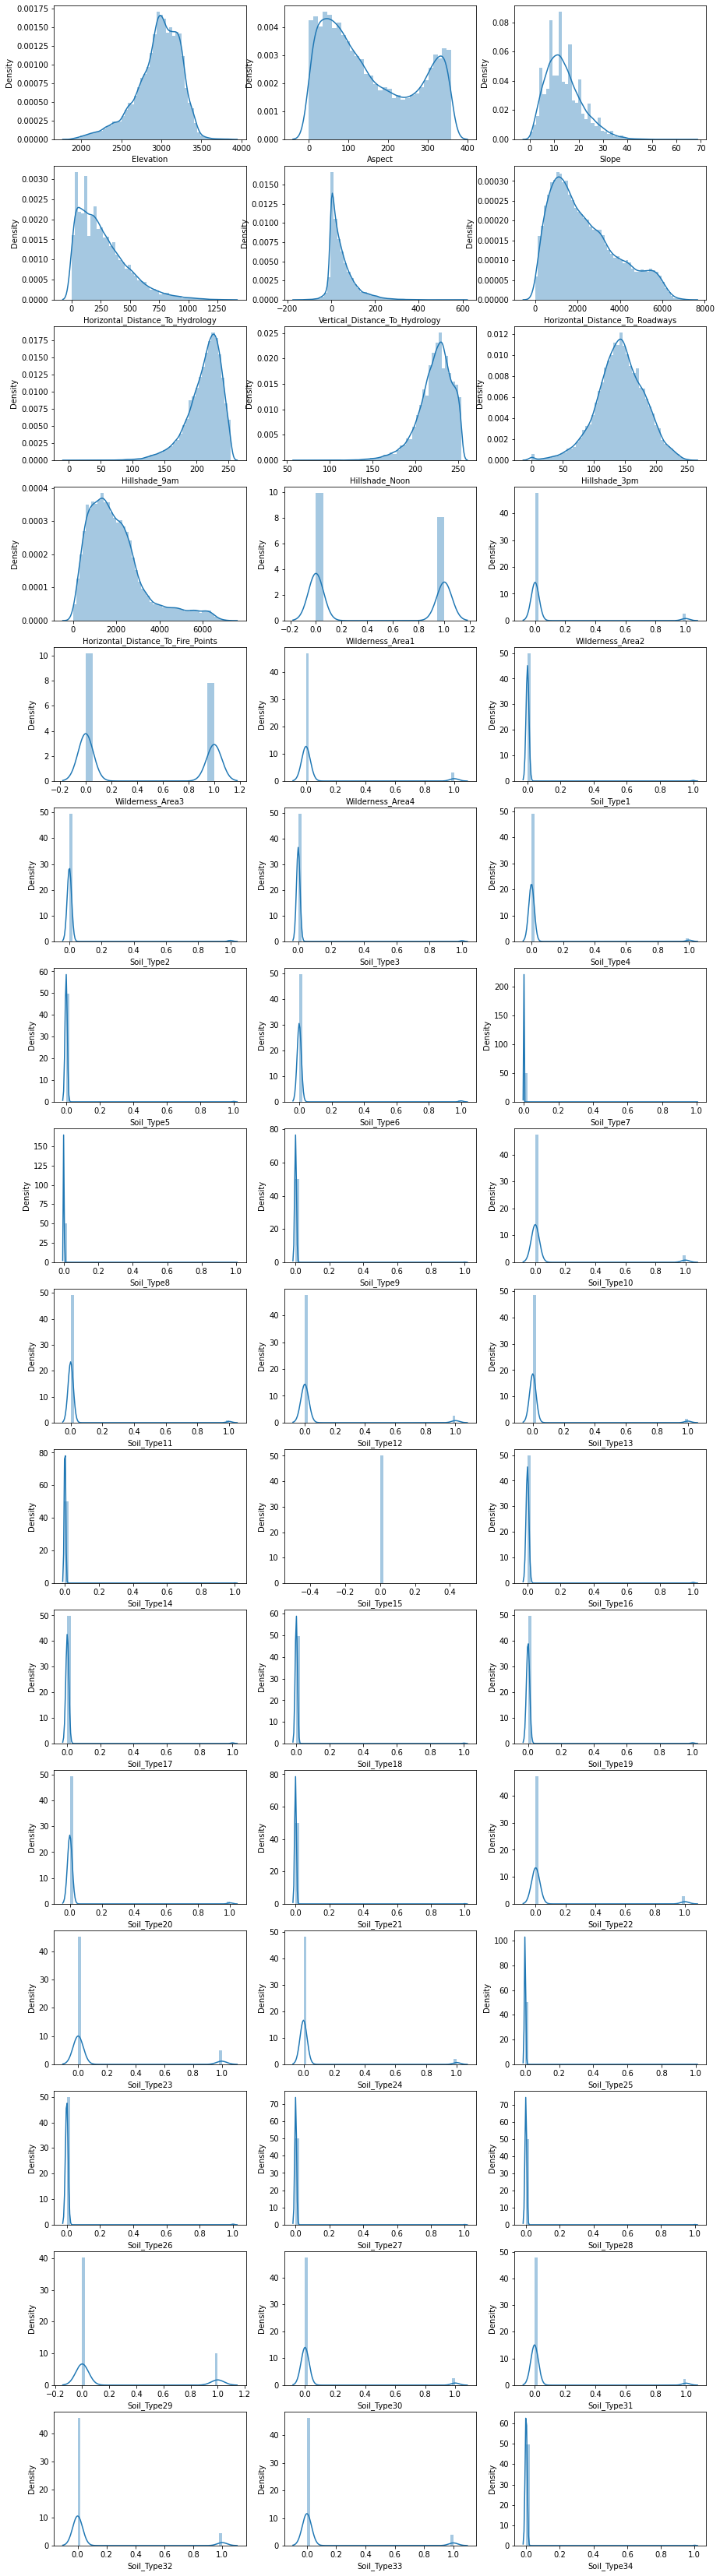

In [ ]:
plt.figure(figsize=(15,60),facecolor='white')
plotnumber=1

for col in x:
  plt.subplot(16,3,plotnumber)
  sns.distplot(x[col])
  plt.xlabel(col,fontsize=10)
  plotnumber+=1
  
plt.show()  

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

ValueError: ignored

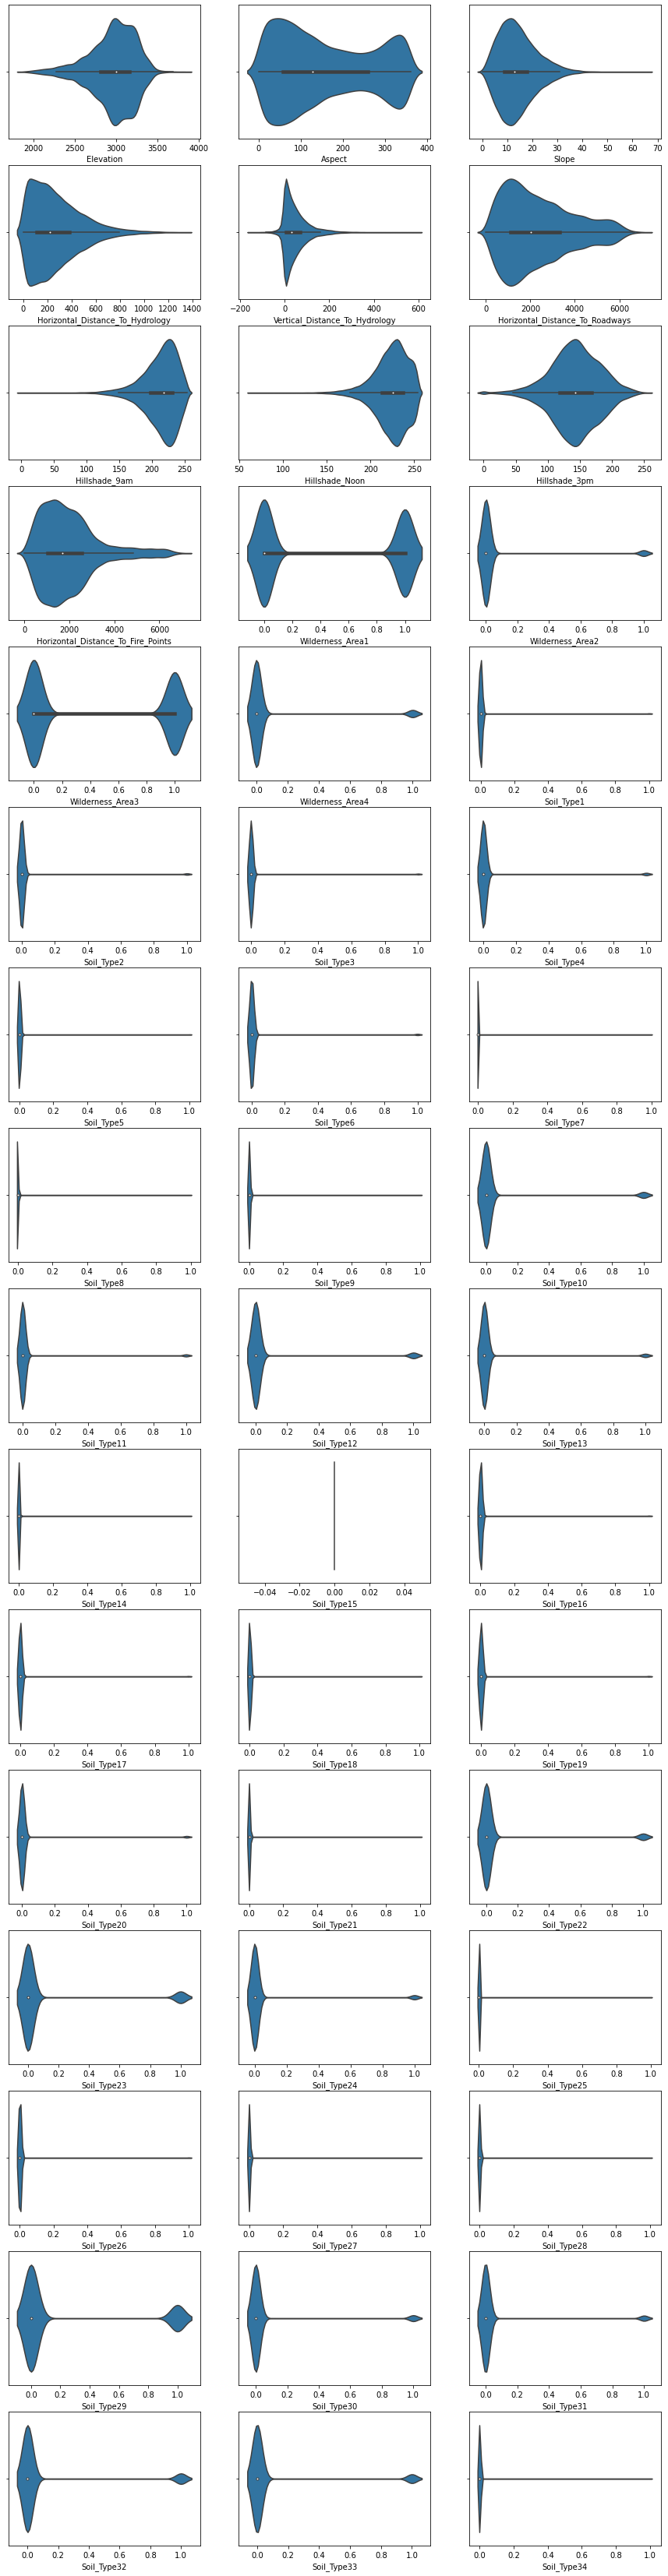

In [ ]:
plt.figure(figsize=(15,60),facecolor='white')
plotnumber=1

for col in x:
  plt.subplot(16,3,plotnumber)
  sns.violinplot(x[col])
  plt.xlabel(col,fontsize=10)
  plotnumber+=1
  
plt.show() 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


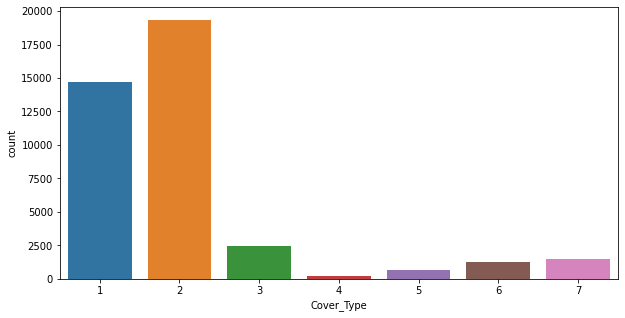

In [ ]:
plt.figure(figsize=(10,5),facecolor='white')
sns.countplot(y)

#Scaleing the dataset with Robustscaler

In [ ]:
scaler = RobustScaler()

In [ ]:
Xr = scaler.fit_transform(x)

## Dataset is imbalance.Let's use SMOTE to balance the dataset.

In [ ]:
smt=SMOTE()

In [ ]:
x_bal,y_bal = smt.fit_resample(Xr,y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


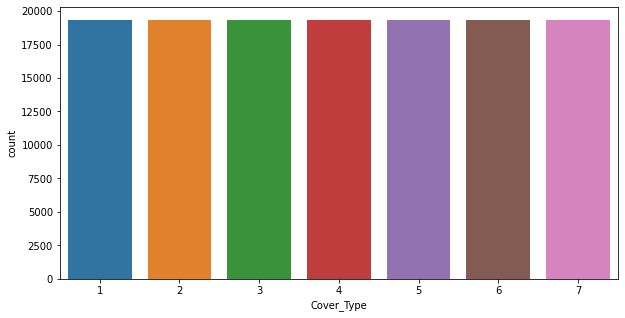

In [ ]:
plt.figure(figsize=(10,5),facecolor='white')
sns.countplot(y_bal)

In [ ]:
def classify(x, y):
    k=KNeighborsClassifier()
    svc=SVC()
    d=DecisionTreeClassifier()
    log=LogisticRegression()
    rf=RandomForestClassifier()
    xgb = XGBClassifier(learning_rate=0.09,n_estimator=500,max_depth = 30,nthread = 4,objective = 'multi:softprob',subsample=0.75)

    #random_state is the seed to create reproducible output
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
    
    algos=[k,svc,d,log,rf,xgb]
    algos_name=['KNeigbors','SVC','DecisionTree','LogisticRegr','RandomForest','XGBoost']
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
   
    result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)
    
    for i in algos:
        
        predict=i.fit(x_train,y_train).predict(x_test)
        
        accuracy.append(accuracy_score(y_test,predict))
        precision.append(precision_score(y_test,predict,average='micro'))
        recall.append(recall_score(y_test,predict,average='micro'))
        f1.append(f1_score(y_test,predict,average='micro'))
        

    
    
    # correctness of predictions
    result.AccuracyScore=accuracy
    # The precision is the ratio tp / (tp + fp) where tp is the number of true positives and 
    # fp the number of false positives. The precision is intuitively the ability of the 
    # classifier not to label as positive a sample that is negative
    result.PrecisionScore=precision
    # The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn 
    # the number of false negatives. The recall is intuitively the ability of the classifier 
    # to find all the positive samples.
    result.RecallScore=recall
    # The F1 score can be interpreted as a harmonic mean of the precision and recall,
    # F1 = 2 * (precision * recall) / (precision + recall)
    result.f1_Score=f1
    
    # more metrics: https://scikit-learn.org/stable/modules/model_evaluation.html
    
    
    ret = result.sort_values('f1_Score',ascending=False)
    bestModelName = ret.iloc[0].name
    bestModel = algos[algos_name.index(bestModelName)]
    return (ret, bestModel)
    

In [ ]:
results = classify(x_bal,y_bal)
results[0]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,AccuracyScore,PrecisionScore,RecallScore,f1_Score
XGBoost,0.967736,0.967736,0.967736,0.967736
RandomForest,0.965260,0.965260,0.965260,0.965260
KNeigbors,0.943455,0.943455,0.943455,0.943455
DecisionTree,0.925900,0.925900,0.925900,0.925900
SVC,0.871277,0.871277,0.871277,0.871277
LogisticRegr,0.729803,0.729803,0.729803,0.729803


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_bal,y_bal, random_state=42)
model = results[1]
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.9674777518256807

## The best model is XGBoost Classifier